# Projeto de Análise de Dados – R. Amaral Office

Grupo: Pedro Regis, Eduardo Barbosa, Murilo Godoy  



## Introdução

A empresa R. Amaral Office atua no fornecimento de móveis, suprimentos e equipamentos para ambientes de trabalho. Com uma base de milhares de pedidos registrados ao longo dos últimos anos, surgiu a oportunidade de usar dados históricos para obter insights valiosos sobre desempenho comercial, lucratividade e comportamento de compra dos clientes.


## Objetivos

### Objetivo geral
Explorar e analisar os dados de vendas da empresa para entender os fatores que mais impactam sua lucratividade.

### Objetivos específicos
- Verificar se um pedido será lucrativo com base nas informações de cliente, produto, desconto, envio, etc.
- Investigar quais produtos,epocas do ano, regiões ou segmentos mais contribuem para lucros ou prejuízos.
- Identificar padrões de desconto que levam a prejuízo.
- Oferecer uma base para decisões comerciais como política de preços, frete e escolha de produtos estratégicos.


## Carregamento e inspeção inicial

In [177]:
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [178]:
df_R_amaral = pd.read_excel('Base de Dados R. Amaral Office.xlsx')
df_R_amaral.head(7)

,id_pedido,nome_cliente,modo_envio,estado,vendas,quantidade,desconto,lucro,segmento,região,...,dia_pedido,dia_semana_pedido,mes_pedido,ano_pedido,dia_envio,mes_envio,ano_envio,data_pedido,mes_ano,tempo_preparacao
0,1,Muhammed MacIntyre,Expresso,Paraná,825.174,9,0.30,-117.8820,Corporativo,Sul,...,4,Domingo,9,2016,6,9,2016,42617,42617,2
1,2,Ruben Dartt,Normal,São Paulo,411.332,4,0.15,-4.8392,Consumidor,Sudeste,...,5,Sexta-feira,9,2014,9,9,2014,41887,41887,4
2,3,Liz Pelletier,Mesmo Dia,São Paulo,411.332,4,0.15,-4.8392,Home Office,Sudeste,...,28,Quinta-feira,11,2013,28,11,2013,41606,41606,0
3,4,Liz Pelletier,Expresso,Amapá,241.960,2,0.00,33.8744,Consumidor,Norte,...,30,Segunda-feira,5,2016,31,5,2016,42520,42520,1
4,5,Liz Pelletier,Normal,Sergipe,341.960,2,0.00,78.6508,Home Office,Nordeste,...,31,Terça-feira,12,2013,7,1,2014,41639,41639,7
5,6,Liz Pelletier,Expresso,Paraná,359.058,3,0.30,-35.9058,Home Office,Sul,...,24,Segunda-feira,3,2014,27,3,2014,41722,41722,3
6,7,Julie Creighton,Mesmo Dia,Rio de Janeiro,136.784,1,0.20,5.1294,Consumidor,Sudeste,...,5,Sexta-feira,6,2015,5,6,2015,42160,42160,0


#### Identificação de problemas:



In [179]:
df_R_amaral.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_pedido          9994 non-null   int64  
 1   nome_cliente       9994 non-null   object 
 2   modo_envio         9994 non-null   object 
 3   estado             9994 non-null   object 
 4   vendas             9994 non-null   float64
 5   quantidade         9994 non-null   int64  
 6   desconto           9994 non-null   float64
 7   lucro              9994 non-null   float64
 8   segmento           9994 non-null   object 
 9   região             9994 non-null   object 
 10  subcategoria       9994 non-null   object 
 11  categoria          9994 non-null   object 
 12  dia_pedido         9994 non-null   int64  
 13  dia_semana_pedido  9994 non-null   object 
 14  mes_pedido         9994 non-null   int64  
 15  ano_pedido         9994 non-null   int64  
 16  dia_envio          9994 

In [180]:
quantidade_nans = df_R_amaral.isna().sum()
print(quantidade_nans)



id_pedido            0
nome_cliente         0
modo_envio           0
estado               0
vendas               0
quantidade           0
desconto             0
lucro                0
segmento             0
região               0
subcategoria         0
categoria            0
dia_pedido           0
dia_semana_pedido    0
mes_pedido           0
ano_pedido           0
dia_envio            0
mes_envio            0
ano_envio            0
data_pedido          0
mes_ano              0
tempo_preparacao     0
dtype: int64


In [181]:
dados_duplicados = df_R_amaral.duplicated().sum()
print(dados_duplicados)



0


In [182]:
df_R_amaral.dtypes


id_pedido              int64
nome_cliente          object
modo_envio            object
estado                object
vendas               float64
quantidade             int64
desconto             float64
lucro                float64
segmento              object
região                object
subcategoria          object
categoria             object
dia_pedido             int64
dia_semana_pedido     object
mes_pedido             int64
ano_pedido             int64
dia_envio              int64
mes_envio              int64
ano_envio              int64
data_pedido            int64
mes_ano                int64
tempo_preparacao       int64
dtype: object

#### Limpeza de dados

Como não foram identificados valores nulos ou duplicados, vamos apenas padronizar as categorias

In [183]:
for coluna in df_R_amaral.select_dtypes(include=["object", "category"]).columns:
    df_R_amaral[coluna] = df_R_amaral[coluna].astype(str).str.strip()

In [184]:
colunas_categoricas = [
    'modo_envio', 'estado', 'segmento', 'região',
    'subcategoria', 'categoria', 'dia_semana_pedido'
]

df_R_amaral[colunas_categoricas] = df_R_amaral[colunas_categoricas].astype('category')

df_R_amaral.dtypes

id_pedido               int64
nome_cliente           object
modo_envio           category
estado               category
vendas                float64
quantidade              int64
desconto              float64
lucro                 float64
segmento             category
região               category
subcategoria         category
categoria            category
dia_pedido              int64
dia_semana_pedido    category
mes_pedido              int64
ano_pedido              int64
dia_envio               int64
mes_envio               int64
ano_envio               int64
data_pedido             int64
mes_ano                 int64
tempo_preparacao        int64
dtype: object

In [185]:
df_R_amaral.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id_pedido          9994 non-null   int64   
 1   nome_cliente       9994 non-null   object  
 2   modo_envio         9994 non-null   category
 3   estado             9994 non-null   category
 4   vendas             9994 non-null   float64 
 5   quantidade         9994 non-null   int64   
 6   desconto           9994 non-null   float64 
 7   lucro              9994 non-null   float64 
 8   segmento           9994 non-null   category
 9   região             9994 non-null   category
 10  subcategoria       9994 non-null   category
 11  categoria          9994 non-null   category
 12  dia_pedido         9994 non-null   int64   
 13  dia_semana_pedido  9994 non-null   category
 14  mes_pedido         9994 non-null   int64   
 15  ano_pedido         9994 non-null   int64   
 16  dia_en

## Estatísticas descritivas das variáveis numéricas

In [186]:
colunas_analisar = ['vendas', 'quantidade', 'desconto', 'lucro', 'tempo_preparacao']

for coluna in colunas_analisar:
    print(f"Estatísticas da coluna '{coluna}':")
    print(df_R_amaral[coluna].describe().round(3))
    print('-' * 50)

Estatísticas da coluna 'vendas':
count     9994.000
mean       229.858
std        623.245
min          0.444
25%         17.280
50%         54.490
75%        209.940
max      22638.480
Name: vendas, dtype: float64
--------------------------------------------------
Estatísticas da coluna 'quantidade':
count    9994.000
mean        3.790
std         2.225
min         1.000
25%         2.000
50%         3.000
75%         5.000
max        14.000
Name: quantidade, dtype: float64
--------------------------------------------------
Estatísticas da coluna 'desconto':
count    9994.000
mean        0.156
std         0.206
min         0.000
25%         0.000
50%         0.200
75%         0.200
max         0.800
Name: desconto, dtype: float64
--------------------------------------------------
Estatísticas da coluna 'lucro':
count    9994.000
mean       28.657
std       234.260
min     -6599.978
25%         1.729
50%         8.666
75%        29.364
max      8399.976
Name: lucro, dtype: float64
-----

In [187]:
colunas_analisar = ['vendas', 'quantidade', 'desconto', 'lucro', 'tempo_preparacao']

for coluna in colunas_analisar:
    print(f"Estatísticas da coluna '{coluna}':")
    print(df_R_amaral[coluna].value_counts())
    print('-' * 50)

Estatísticas da coluna 'vendas':
vendas
12.960     56
15.552     39
19.440     39
10.368     36
25.920     36
           ..
4.920       1
1.640       1
19.830      1
39.660      1
235.188     1
Name: count, Length: 5825, dtype: int64
--------------------------------------------------
Estatísticas da coluna 'quantidade':
quantidade
3     2409
2     2402
5     1230
4     1191
1      899
7      606
6      572
9      258
8      257
10      57
11      34
14      29
13      27
12      23
Name: count, dtype: int64
--------------------------------------------------
Estatísticas da coluna 'desconto':
desconto
0.00    4798
0.20    3657
0.70     418
0.80     300
0.30     227
0.40     206
0.60     138
0.10      94
0.50      66
0.15      52
0.32      27
0.45      11
Name: count, dtype: int64
--------------------------------------------------
Estatísticas da coluna 'lucro':
lucro
 0.0000      65
 6.2208      43
 9.3312      38
 3.6288      32
 5.4432      32
             ..
-20.0904      1
 1.4418  

### Graficos da análise descritiva

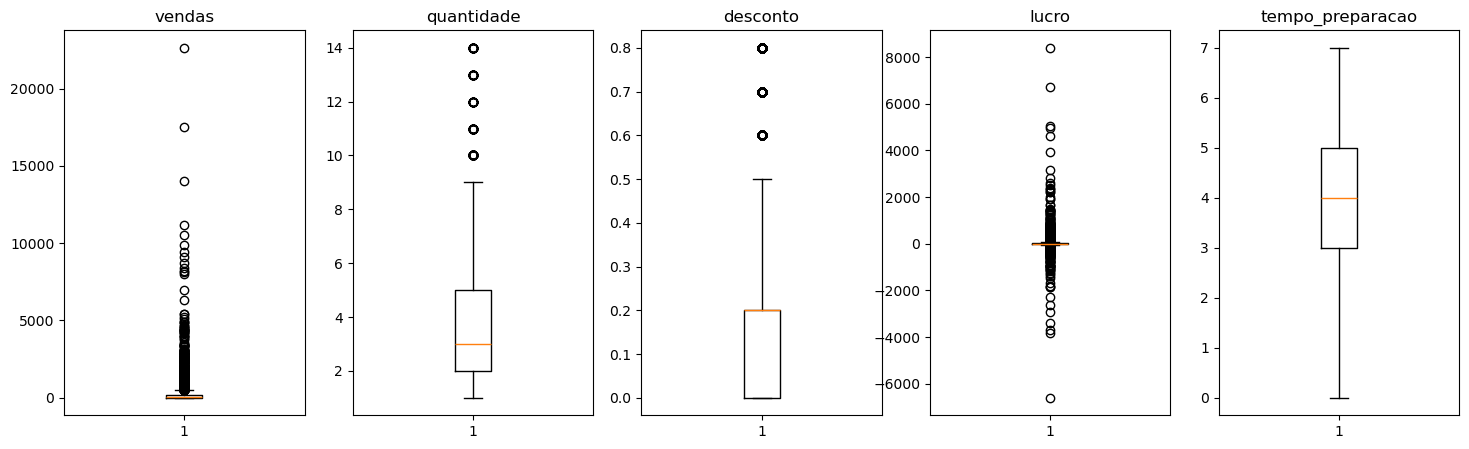

In [188]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 5, 1)
plt.boxplot(df_R_amaral['vendas'])
plt.title('vendas')

plt.subplot(1, 5, 2)
plt.boxplot(df_R_amaral['quantidade'])
plt.title('quantidade')

plt.subplot(1, 5, 3)
plt.boxplot(df_R_amaral['desconto'])
plt.title('desconto')

plt.subplot(1, 5, 4)
plt.boxplot(df_R_amaral['lucro'])
plt.title('lucro')

plt.subplot(1, 5, 5)
plt.boxplot(df_R_amaral['tempo_preparacao'])
plt.title('tempo_preparacao')

plt.show()


Com esses valores, podemos perceber que existem muitos outliers na coluna de vendas e lucro, sendo necessario a remoção deles para uma melhor análise.

In [189]:
p5_vendas, p98_vendas = np.percentile(df_R_amaral['vendas'], [5, 98])
p5_lucro, p98_lucro = np.percentile(df_R_amaral['lucro'], [5, 98])

df_R_amaral = df_R_amaral[
    df_R_amaral['vendas'].between(p5_vendas, p98_vendas)
]


df_R_amaral = df_R_amaral[
    df_R_amaral['lucro'].between(p5_lucro, p98_lucro)
]


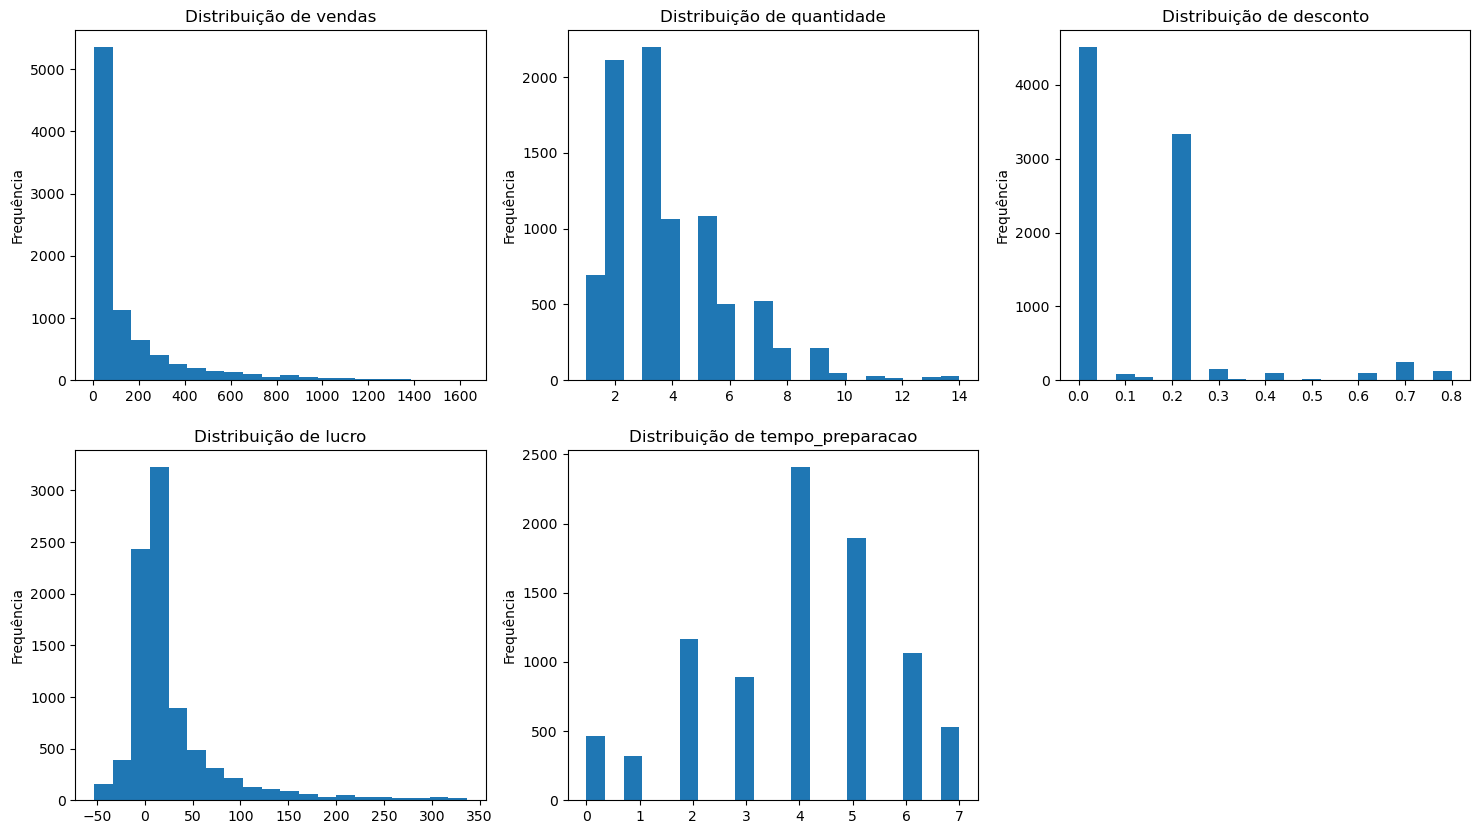

In [190]:
plt.figure(figsize=(18, 10))



plt.subplot(2, 3, 1)
plt.hist(df_R_amaral['vendas'], bins=20)
plt.title('Distribuição de vendas')
plt.ylabel('Frequência')

plt.subplot(2, 3, 2)
plt.hist(df_R_amaral['quantidade'], bins=20)
plt.title('Distribuição de quantidade')
plt.ylabel('Frequência')

plt.subplot(2, 3, 3)
plt.hist(df_R_amaral['desconto'], bins=20)
plt.title('Distribuição de desconto')
plt.ylabel('Frequência')


plt.subplot(2, 3, 4)
plt.hist(df_R_amaral['lucro'], bins=20)
plt.title('Distribuição de lucro')
plt.ylabel('Frequência')

plt.subplot(2, 3, 5)
plt.hist(df_R_amaral['tempo_preparacao'], bins=20)
plt.title('Distribuição de tempo_preparacao')
plt.ylabel('Frequência')


plt.show()


## Exploração das categorias

In [191]:
for coluna in df_R_amaral.select_dtypes(include="category").columns:
    print(f"Valores únicos da coluna '{coluna}':")
    print(df_R_amaral[coluna].unique())
    print('-' * 50)


Valores únicos da coluna 'modo_envio':
['Normal', 'Mesmo Dia', 'Expresso', 'Econômico']
Categories (4, object): ['Econômico', 'Expresso', 'Mesmo Dia', 'Normal']
--------------------------------------------------
Valores únicos da coluna 'estado':
['São Paulo', 'Amapá', 'Sergipe', 'Paraná', 'Rio de Janeiro', ..., 'Paraíba', 'Rondônia', 'Mato Grosso do Sul', 'Tocantins', 'Acre']
Length: 27
Categories (27, object): ['Acre', 'Alagoas', 'Amapá', 'Amazonas', ..., 'Santa Catarina', 'Sergipe', 'São Paulo', 'Tocantins']
--------------------------------------------------
Valores únicos da coluna 'segmento':
['Consumidor', 'Home Office', 'Corporativo']
Categories (3, object): ['Consumidor', 'Corporativo', 'Home Office']
--------------------------------------------------
Valores únicos da coluna 'região':
['Sudeste', 'Norte', 'Nordeste', 'Sul', 'Centro-Oeste']
Categories (5, object): ['Centro-Oeste', 'Nordeste', 'Norte', 'Sudeste', 'Sul']
--------------------------------------------------
Valores 

In [192]:
for coluna in df_R_amaral.select_dtypes(include="category").columns:
    print(f"Valores únicos da coluna '{coluna}':")
    print(df_R_amaral[coluna].value_counts())
    print('-' * 50)


Valores únicos da coluna 'modo_envio':
modo_envio
Normal       5195
Econômico    1728
Expresso     1335
Mesmo Dia     485
Name: count, dtype: int64
--------------------------------------------------
Valores únicos da coluna 'estado':
estado
São Paulo              1965
Rio de Janeiro         1028
Minas Gerais            755
Amazonas                466
Rio Grande do Sul       443
Paraná                  419
Pernambuco              379
Bahia                   371
Espírito Santo          317
Maranhão                259
Goiás                   248
Santa Catarina          236
Sergipe                 172
Ceará                   172
Pará                    156
Alagoas                 154
Mato Grosso do Sul      147
Mato Grosso             142
Rio Grande do Norte     141
Roraima                 136
Paraíba                 132
Piauí                   132
Tocantins               115
Rondônia                 77
Distrito Federal         70
Acre                     64
Amapá                    47
Nam

## Graficos da analise categorica

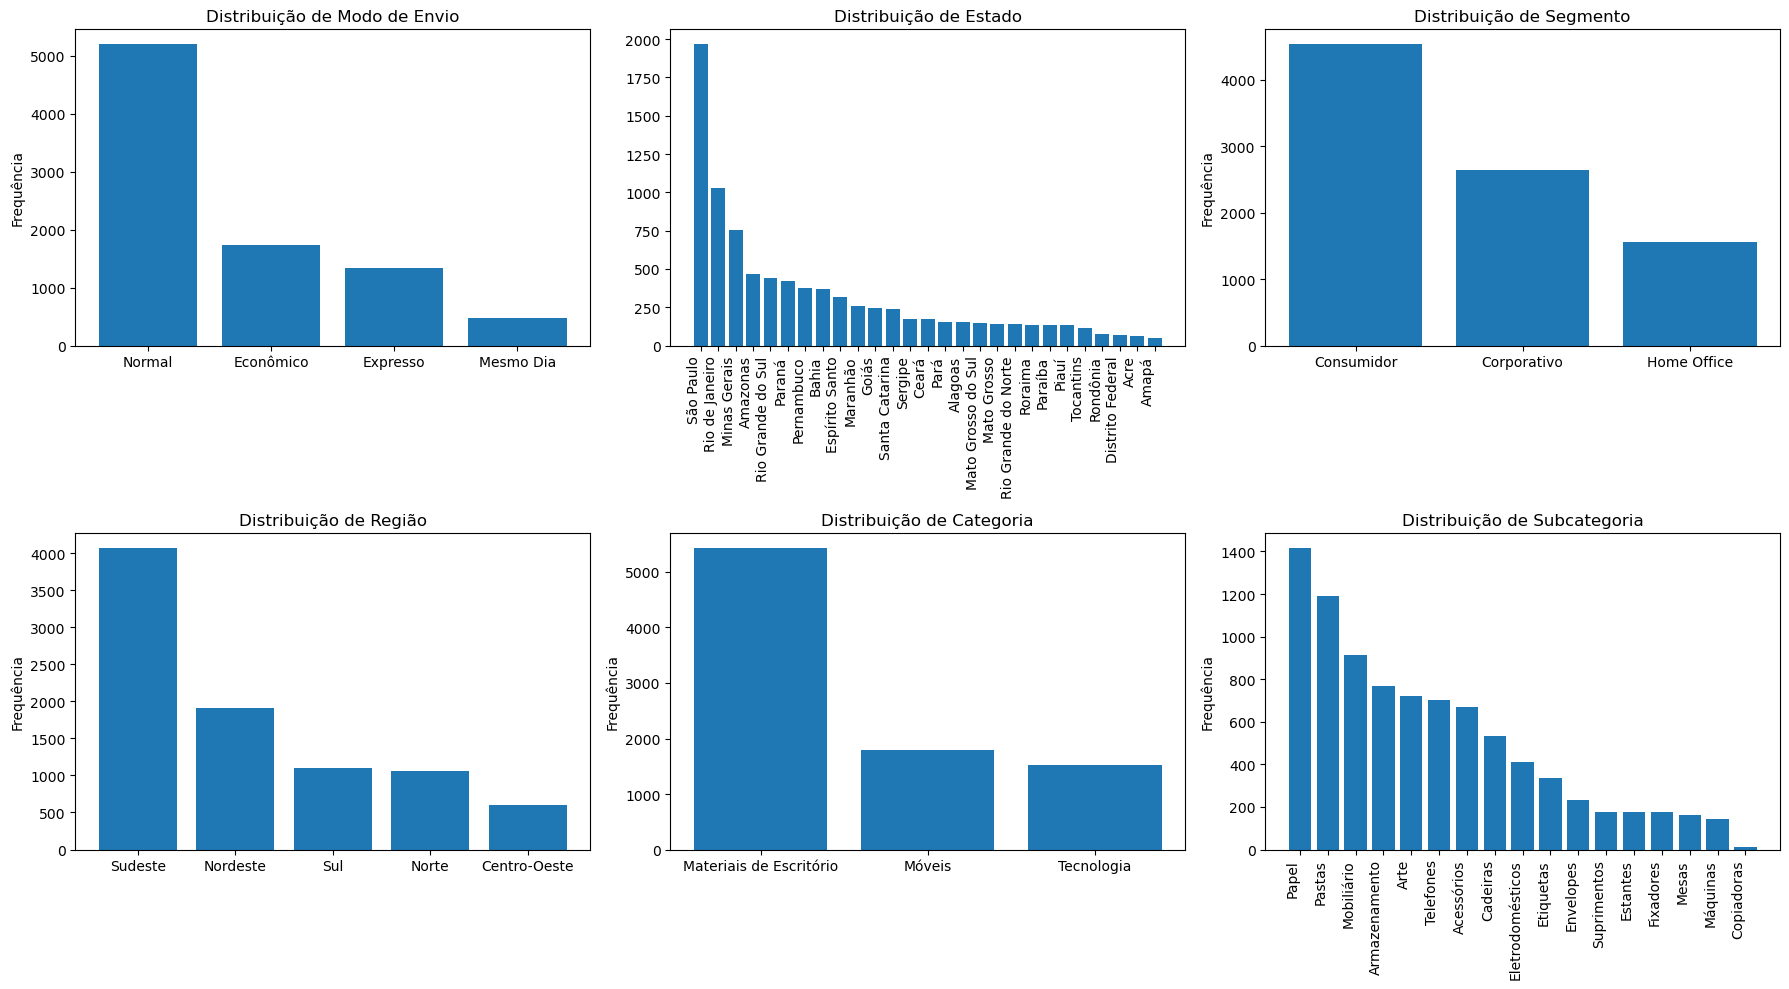

In [193]:
plt.figure(figsize=(18, 10))

plt.subplot(2, 3, 1)
counts = df_R_amaral['modo_envio'].value_counts()
plt.bar(counts.index, counts.values)
plt.title('Distribuição de Modo de Envio')
plt.ylabel('Frequência')


plt.subplot(2, 3, 2)
counts = df_R_amaral['estado'].value_counts()
plt.bar(counts.index, counts.values)
plt.title('Distribuição de Estado')
plt.xticks(rotation=90, ha='right')

plt.subplot(2, 3, 3)
counts = df_R_amaral['segmento'].value_counts()
plt.bar(counts.index, counts.values)
plt.title('Distribuição de Segmento')
plt.ylabel('Frequência')


plt.subplot(2, 3, 4)
counts = df_R_amaral['região'].value_counts()
plt.bar(counts.index, counts.values)
plt.title('Distribuição de Região')
plt.ylabel('Frequência')


plt.subplot(2, 3, 5)
counts = df_R_amaral['categoria'].value_counts()
plt.bar(counts.index, counts.values)
plt.title('Distribuição de Categoria')
plt.ylabel('Frequência')

plt.subplot(2, 3, 6)
counts = df_R_amaral['subcategoria'].value_counts()
plt.bar(counts.index, counts.values)
plt.title('Distribuição de Subcategoria')
plt.ylabel('Frequência')
plt.xticks(rotation=90, ha='right')

plt.tight_layout()
plt.show()

## Geração de dummis para verificar correlação entre as colunas

In [194]:
df_R_amaral.head(3)

,id_pedido,nome_cliente,modo_envio,estado,vendas,quantidade,desconto,lucro,segmento,região,...,dia_pedido,dia_semana_pedido,mes_pedido,ano_pedido,dia_envio,mes_envio,ano_envio,data_pedido,mes_ano,tempo_preparacao
1,2,Ruben Dartt,Normal,São Paulo,411.332,4,0.15,-4.8392,Consumidor,Sudeste,...,5,Sexta-feira,9,2014,9,9,2014,41887,41887,4
2,3,Liz Pelletier,Mesmo Dia,São Paulo,411.332,4,0.15,-4.8392,Home Office,Sudeste,...,28,Quinta-feira,11,2013,28,11,2013,41606,41606,0
3,4,Liz Pelletier,Expresso,Amapá,241.960,2,0.00,33.8744,Consumidor,Norte,...,30,Segunda-feira,5,2016,31,5,2016,42520,42520,1


In [195]:
colunas_relevantes = [
    'modo_envio', 'estado', 'segmento', 'região',
    'categoria', 'subcategoria', 'mes_pedido', 'tempo_preparacao',
    'desconto', 'vendas', 'quantidade', 'lucro'
]
df_corr = df_R_amaral[colunas_relevantes].copy()


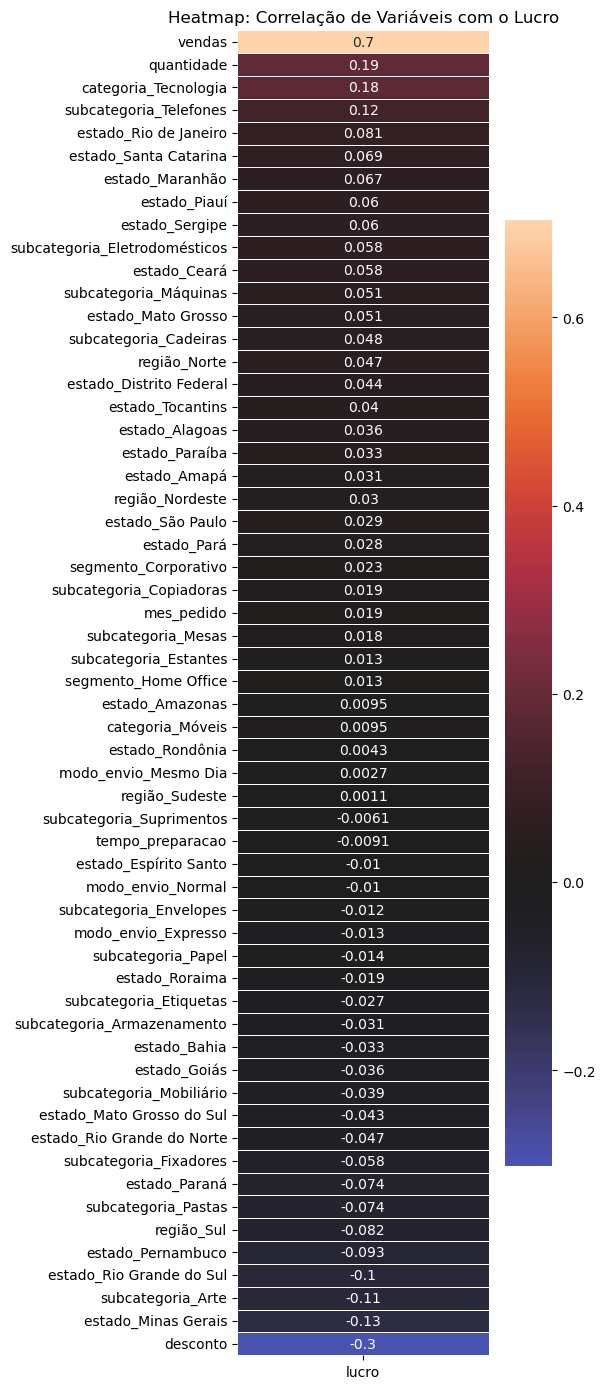

In [196]:

df_dummies = pd.get_dummies(df_corr, drop_first=True, dtype=int)

correlacoes_com_lucro = df_dummies.corr()['lucro'].drop('lucro').sort_values()

plt.figure(figsize=(6, 14))
sns.heatmap(correlacoes_com_lucro.to_frame(), annot=True, center=0, linewidths=0.5,)
plt.title('Heatmap: Correlação de Variáveis com o Lucro')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

Dado esse resultado, podemos concluir que as unicas variaveis que realmente influemciam o lucro são as vendas e o desconto, porém outras variaveis podem influenciar nas vendas e no desconto que consequentemente influemciam no lucro.

Portanto, faremos outros heatmaps das vendas e desconto para verificar essa correlação

In [197]:
correlacoes_vendas = df_dummies.corr()['vendas'].drop('vendas').sort_values()
correlacoes_desconto = df_dummies.corr()['desconto'].drop('desconto').sort_values()


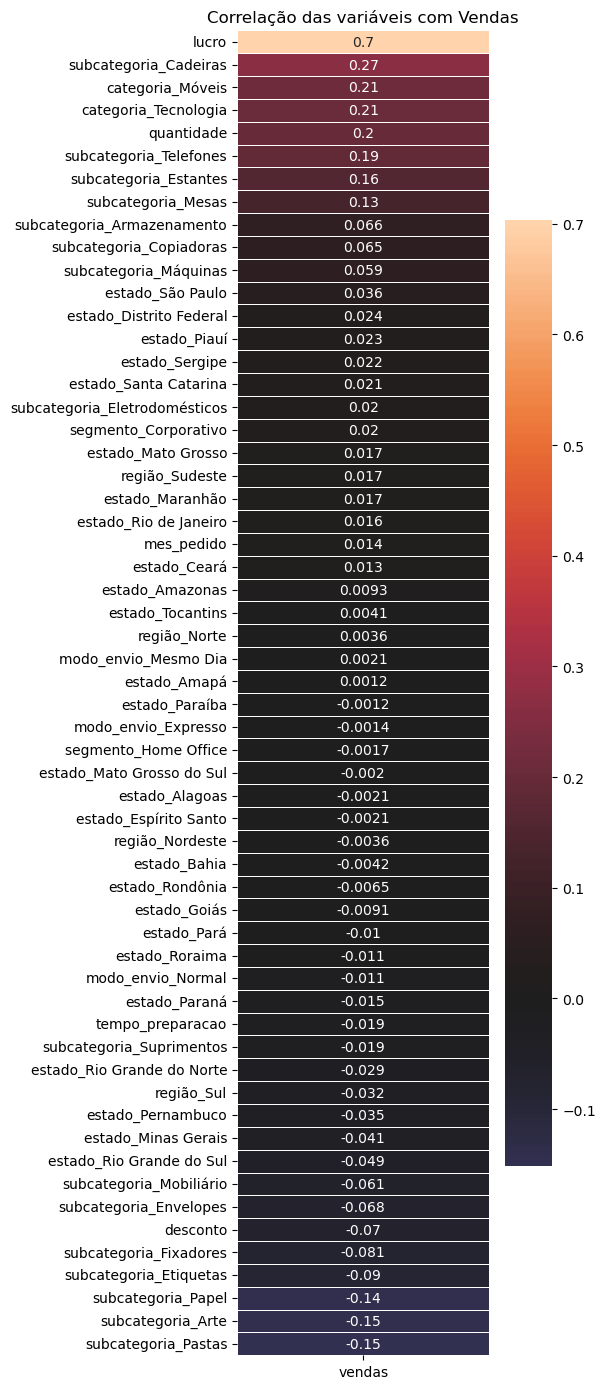

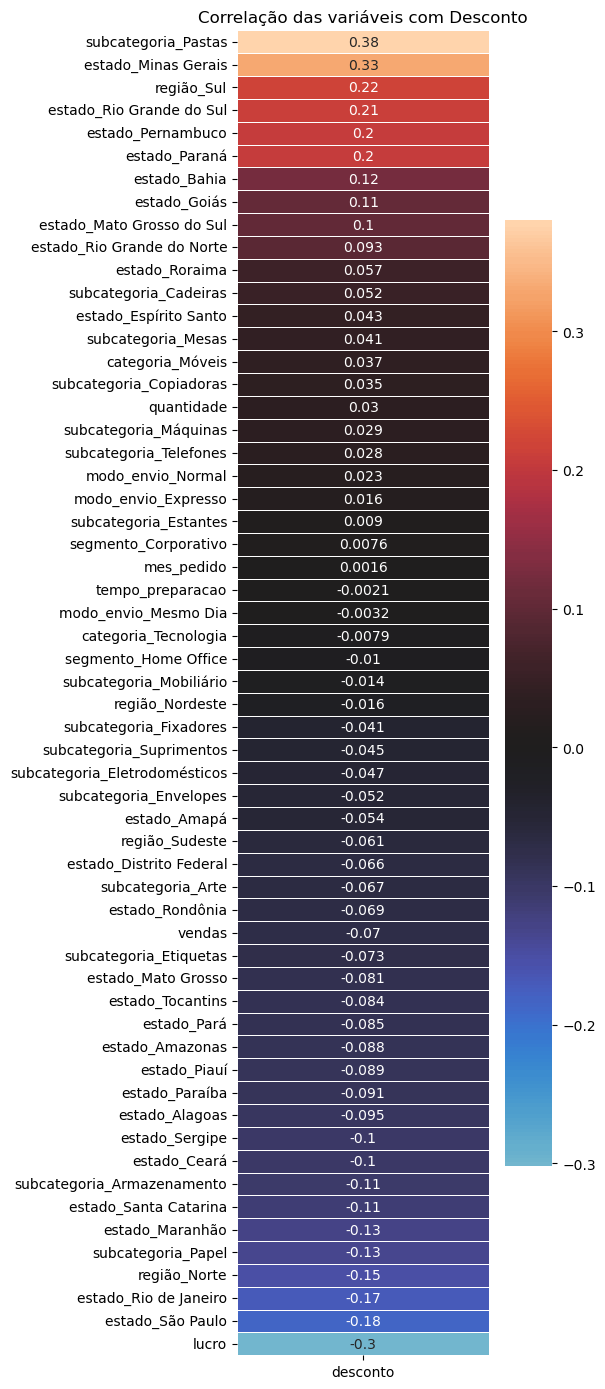

In [198]:
plt.figure(figsize=(6, 14))
sns.heatmap(correlacoes_vendas.to_frame(), annot=True, center=0, linewidths=0.5)
plt.title('Correlação das variáveis com Vendas')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 14))
sns.heatmap(correlacoes_desconto.to_frame(), annot=True, center=0, linewidths=0.5)
plt.title('Correlação das variáveis com Desconto')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()



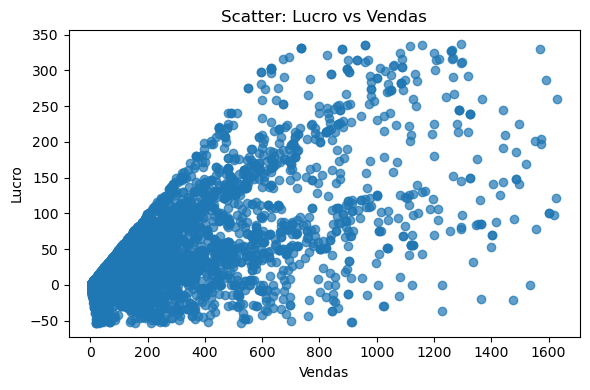

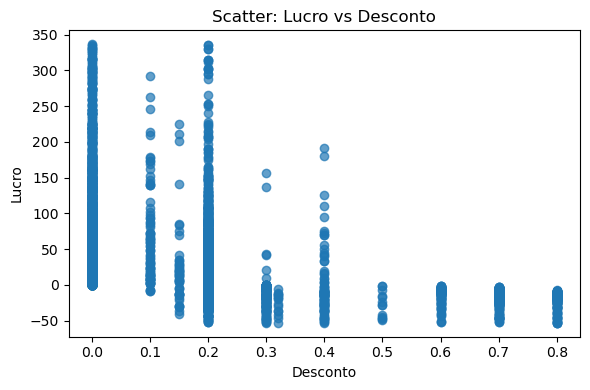

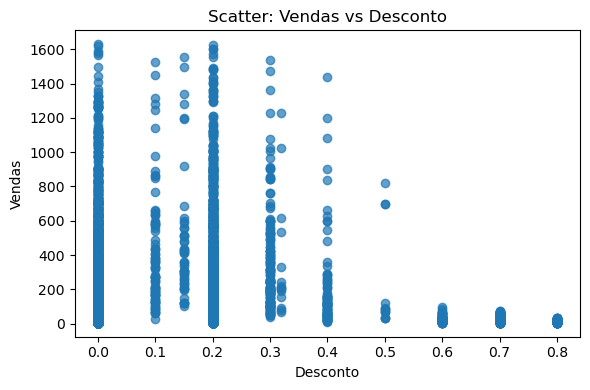

In [199]:
plt.figure(figsize=(6, 4))
plt.scatter(df_R_amaral['vendas'], df_R_amaral['lucro'], alpha=0.7)
plt.xlabel('Vendas')
plt.ylabel('Lucro')
plt.title('Scatter: Lucro vs Vendas')
plt.tight_layout()
plt.show()


plt.figure(figsize=(6, 4))
plt.scatter(df_R_amaral['desconto'], df_R_amaral['lucro'], alpha=0.7)
plt.xlabel('Desconto')
plt.ylabel('Lucro')
plt.title('Scatter: Lucro vs Desconto')
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
plt.scatter(df_R_amaral['desconto'], df_R_amaral['vendas'], alpha=0.7)
plt.xlabel('Desconto')
plt.ylabel('Vendas')
plt.title('Scatter: Vendas vs Desconto')
plt.tight_layout()
plt.show()

## Definindo a variável-alvo

Com o objetivo de prever se uma venda é suficientemente lucrativa, criamos a variável `margem_lucro`, que representa a margem percentual de lucro sobre a venda.  
A partir disso, definimos uma nova variável chamada `lucro_aceitavel`, que é igual a 1 quando a margem de lucro é superior a **10%**, e 0 caso contrário.  
Essa variável será a **variável-alvo** da modelagem preditiva.


## Preparação da base para criar o modelo

In [200]:
df_R_amaral['margem_lucro'] = (df_R_amaral['lucro'] / df_R_amaral['vendas']) * 100


limite = 20  # decidimos colocar como sendo 20%
df_R_amaral['lucro_aceitavel'] = (df_R_amaral['margem_lucro'] > limite).astype(int)


colunas_para_modelo = df_dummies.columns.drop(['lucro']) 

# X = dados de entrada, y é o que queremos prever
X = df_dummies[colunas_para_modelo]
Y = df_R_amaral['lucro_aceitavel']

df_R_amaral

,id_pedido,nome_cliente,modo_envio,estado,vendas,quantidade,desconto,lucro,segmento,região,...,mes_pedido,ano_pedido,dia_envio,mes_envio,ano_envio,data_pedido,mes_ano,tempo_preparacao,margem_lucro,lucro_aceitavel
1,2,Ruben Dartt,Normal,São Paulo,411.332,4,0.15,-4.8392,Consumidor,Sudeste,...,9,2014,9,9,2014,41887,41887,4,-1.176471,0
2,3,Liz Pelletier,Mesmo Dia,São Paulo,411.332,4,0.15,-4.8392,Home Office,Sudeste,...,11,2013,28,11,2013,41606,41606,0,-1.176471,0
3,4,Liz Pelletier,Expresso,Amapá,241.960,2,0.00,33.8744,Consumidor,Norte,...,5,2016,31,5,2016,42520,42520,1,14.000000,0
4,5,Liz Pelletier,Normal,Sergipe,341.960,2,0.00,78.6508,Home Office,Nordeste,...,12,2013,7,1,2014,41639,41639,7,23.000000,1
5,6,Liz Pelletier,Expresso,Paraná,359.058,3,0.30,-35.9058,Home Office,Sul,...,3,2014,27,3,2014,41722,41722,3,-10.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,Max Jones,Expresso,Minas Gerais,1097.544,7,0.20,123.4737,Corporativo,Sudeste,...,12,2015,11,12,2015,42347,42347,2,11.250000,0
9990,9991,Kristina Nunn,Expresso,Mato Grosso,979.950,5,0.00,284.1855,Consumidor,Centro-Oeste,...,12,2016,4,12,2016,42706,42706,2,29.000000,1
9991,9992,Kristina Nunn,Normal,Pernambuco,235.188,2,0.40,-43.1178,Corporativo,Nordeste,...,1,2014,17,1,2014,41651,41651,5,-18.333333,0
9992,9993,Sean Miller,Expresso,Alagoas,391.980,2,0.00,113.6742,Consumidor,Nordeste,...,9,2016,24,9,2016,42635,42635,2,29.000000,1


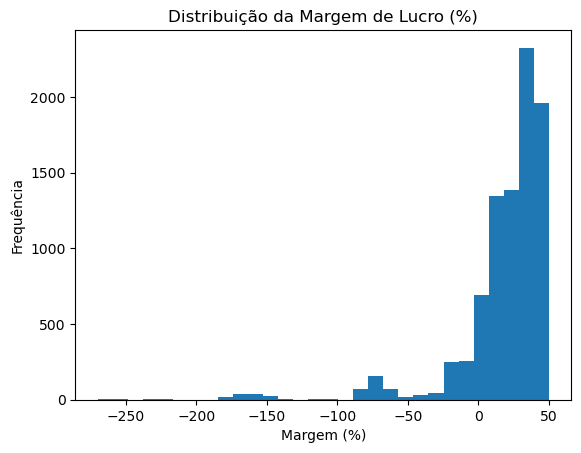

In [201]:
plt.hist(df_R_amaral['margem_lucro'], bins=30)
plt.title('Distribuição da Margem de Lucro (%)')
plt.xlabel('Margem (%)')
plt.ylabel('Frequência')
plt.show()

O histograma acima mostra como a margem de lucro está distribuída nas vendas realizadas.  
Observamos que há muitas vendas com margem próxima de 0%, o que **reforça a necessidade de estabelecer um limite mínimo para considerar o lucro aceitável**, neste caso definido como 20%.


In [202]:
df_R_amaral['lucro_aceitavel'].value_counts()

lucro_aceitavel
1    5499
0    3244
Name: count, dtype: int64

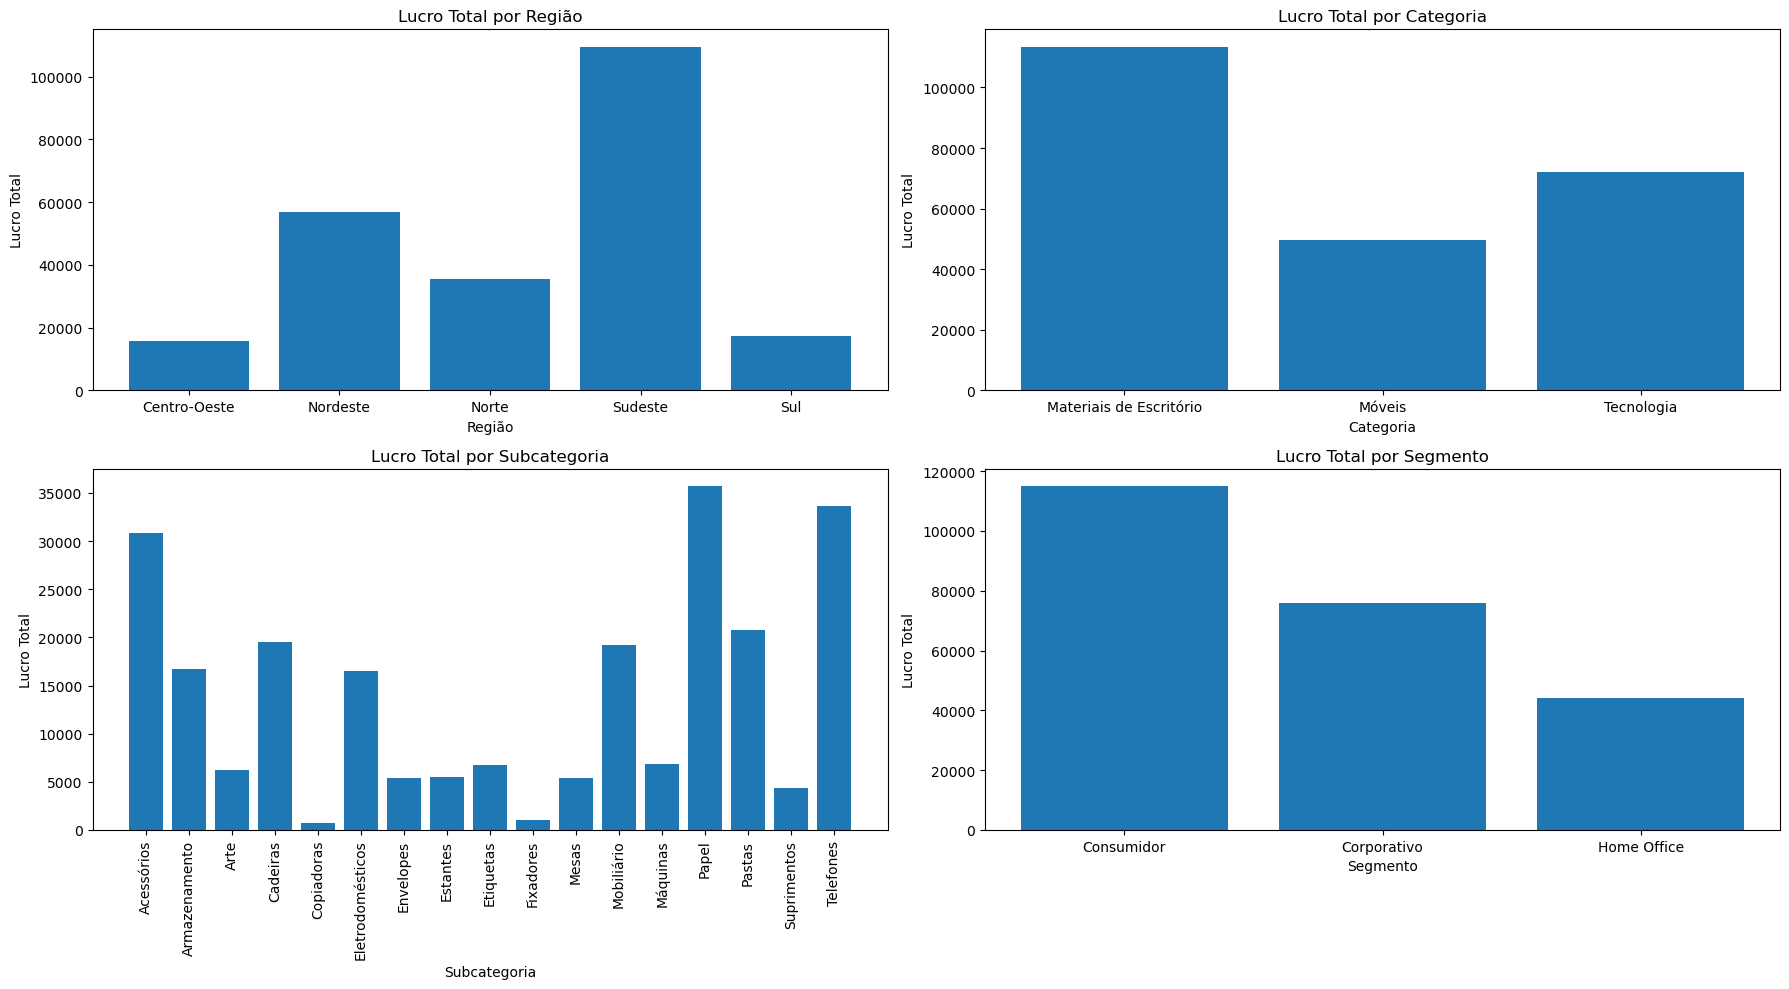

In [203]:
plt.figure(figsize=(18, 10))

plt.subplot(2, 2, 1)
lucro_por_regiao = df_R_amaral.groupby('região', observed=True)['lucro'].sum()
plt.bar(lucro_por_regiao.index, lucro_por_regiao.values)
plt.title('Lucro Total por Região')
plt.xlabel('Região')
plt.ylabel('Lucro Total')


plt.subplot(2, 2, 2)
lucro_por_categoria = df_R_amaral.groupby('categoria', observed=True)['lucro'].sum()
plt.bar(lucro_por_categoria.index, lucro_por_categoria.values)
plt.title('Lucro Total por Categoria')
plt.xlabel('Categoria')
plt.ylabel('Lucro Total')


plt.subplot(2, 2, 3)
lucro_por_subcategoria = df_R_amaral.groupby('subcategoria', observed=True)['lucro'].sum()
plt.bar(lucro_por_subcategoria.index, lucro_por_subcategoria.values)
plt.title('Lucro Total por Subcategoria')
plt.xlabel('Subcategoria')
plt.ylabel('Lucro Total')
plt.xticks(rotation=90)

plt.subplot(2, 2, 4)
lucro_por_segmento = df_R_amaral.groupby('segmento', observed=True)['lucro'].sum()
plt.bar(lucro_por_segmento.index, lucro_por_segmento.values)
plt.title('Lucro Total por Segmento')
plt.xlabel('Segmento')
plt.ylabel('Lucro Total')


plt.tight_layout()
plt.show()


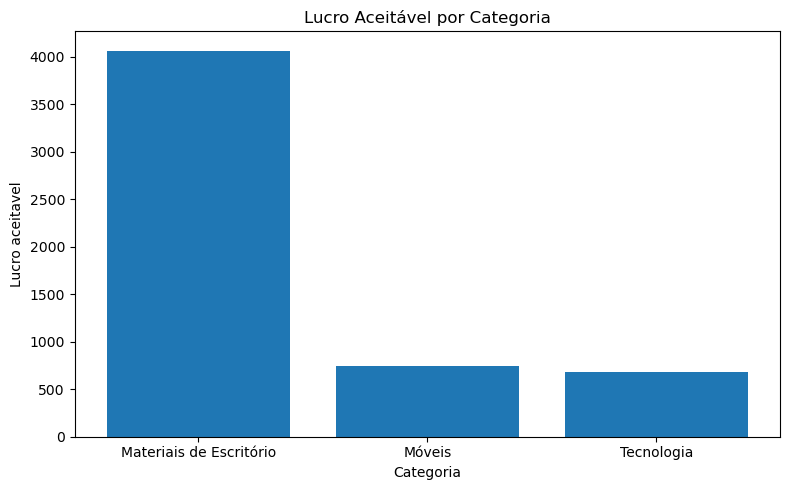

In [204]:
lucro_aceitavel_por_categoria = df_R_amaral.groupby('categoria', observed=True)['lucro_aceitavel'].sum().reset_index()

plt.figure(figsize=(8, 5))
plt.bar(lucro_aceitavel_por_categoria['categoria'], lucro_aceitavel_por_categoria['lucro_aceitavel'])
plt.title('Lucro Aceitável por Categoria')
plt.xlabel('Categoria')
plt.ylabel('Lucro aceitavel')
plt.tight_layout()
plt.show()


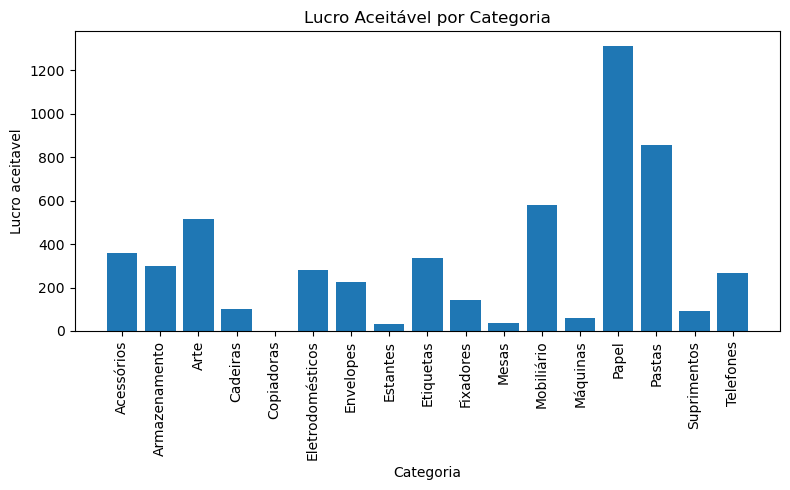

In [223]:
lucro_aceitavel_por_subcategoria = df_R_amaral.groupby('subcategoria', observed=True)['lucro_aceitavel'].sum().reset_index()

plt.figure(figsize=(8, 5))
plt.bar(lucro_aceitavel_por_subcategoria['subcategoria'], lucro_aceitavel_por_subcategoria['lucro_aceitavel'])
plt.title('Lucro Aceitável por Categoria')
plt.xlabel('Categoria')
plt.ylabel('Lucro aceitavel')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [205]:
lucro_aceitavel_por_categoria = df_R_amaral.groupby('categoria', observed=True)['lucro_aceitavel'].value_counts()
print(lucro_aceitavel_por_categoria)


print('\nmateriais de escritorio: ',4030 / 5384 * 100, '%')
print('moveis: ',728/1745 * 100 ,'%')
print('eletronicos: ',655/1487 * 100, '%')

categoria                lucro_aceitavel
Materiais de Escritório  1                  4065
                         0                  1362
Móveis                   0                  1037
                         1                   749
Tecnologia               0                   845
                         1                   685
Name: count, dtype: int64

materiais de escritorio:  74.85141158989599 %
moveis:  41.71919770773639 %
eletronicos:  44.04841963685273 %


## Início da Modelagem Preditiva

Com a variável-alvo `lucro_aceitavel` definida, iniciamos o processo de criação de modelos preditivos para identificar, com base nas características das vendas, **quais delas têm maior chance de gerar lucro aceitável**.

In [206]:
from sklearn.model_selection import train_test_split

X_treino, X_teste, y_treino, y_teste = train_test_split(X, Y, test_size=0.3, random_state=42,stratify=Y)

### Modelo 1 - Regressão Logística

A Regressão Logística foi o modelo inicial escolhido por ser eficiente e fornecer bons resultados para tarefas de classificação binária.

In [207]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


param_grid = {
    'C':       [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver':  ['liblinear']
}


cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


grid_lr = GridSearchCV(
    LogisticRegression(random_state=42, max_iter=2000),
    param_grid,
    cv=cv,
    scoring='recall_macro',
    n_jobs=-1,
    verbose=1
)
grid_lr.fit(X_treino, y_treino)

print("Melhores parâmetros LR:", grid_lr.best_params_)


best_lr = grid_lr.best_estimator_

y_pred_train_gs = best_lr.predict(X_treino)
print("=== LR Tunado — TREINO ===")
print(classification_report(y_treino, y_pred_train_gs))

y_pred_test_gs = best_lr.predict(X_teste)
print("=== LR Tunado — TESTE ===")
print(classification_report(y_teste, y_pred_test_gs))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Melhores parâmetros LR: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
=== LR Tunado — TREINO ===
              precision    recall  f1-score   support

           0       0.85      0.82      0.84      2271
           1       0.90      0.91      0.91      3849

    accuracy                           0.88      6120
   macro avg       0.87      0.87      0.87      6120
weighted avg       0.88      0.88      0.88      6120

=== LR Tunado — TESTE ===
              precision    recall  f1-score   support

           0       0.84      0.83      0.84       973
           1       0.90      0.91      0.90      1650

    accuracy                           0.88      2623
   macro avg       0.87      0.87      0.87      2623
weighted avg       0.88      0.88      0.88      2623



### Curva ROC - Regressão Logística

A Curva ROC mostra como o modelo se comporta na hora de **acertar as classificações**.  
Ela compara duas taxas:
- A quantidade de acertos em casos positivos (vendas com lucro aceitável);
- E os erros cometidos em casos negativos (vendas sem lucro).

A curva é construída testando o modelo com **diferentes níveis de confiança** para decidir se uma venda deve ser considerada lucrativa ou não.

O valor chamado AUC (Área sob a Curva) resume o desempenho do modelo: quanto mais próximo de 1, **melhor o modelo é em separar corretamente os dois tipos de venda**.


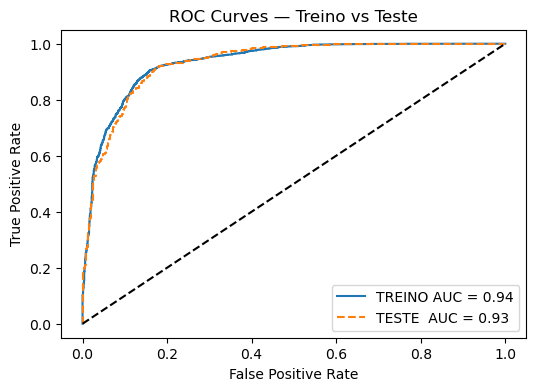

In [208]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


y_prob_train = best_lr.predict_proba(X_treino)[:, 1]
y_prob_test  = best_lr.predict_proba(X_teste)[:, 1]


fpr_tr, tpr_tr, _ = roc_curve(y_treino, y_prob_train)
roc_auc_tr = auc(fpr_tr, tpr_tr)
fpr_te, tpr_te, _ = roc_curve(y_teste, y_prob_test)
roc_auc_te = auc(fpr_te, tpr_te)


plt.figure(figsize=(6,4))
plt.plot(fpr_tr, tpr_tr,      label=f'TREINO AUC = {roc_auc_tr:.2f}')
plt.plot(fpr_te, tpr_te, '--', label=f'TESTE  AUC = {roc_auc_te:.2f}')
plt.plot([0,1], [0,1], 'k--')
plt.title('ROC Curves — Treino vs Teste')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

### Matriz de Confusão - Regressão Logística

A matriz de confusão mostra quantas vendas o modelo acertou ou errou em cada caso.  
Ela é dividida em quatro partes:
- Acertos quando o modelo disse que teria lucro e realmente teve;
- Acertos quando o modelo disse que não teria lucro e realmente não teve;
- Erros quando o modelo achou que teria lucro, mas não teve (falso positivo);
- Erros quando o modelo achou que não teria lucro, mas teve (falso negativo).

Essa visualização ajuda a entender **em que tipo de erro o modelo mais está caindo**.


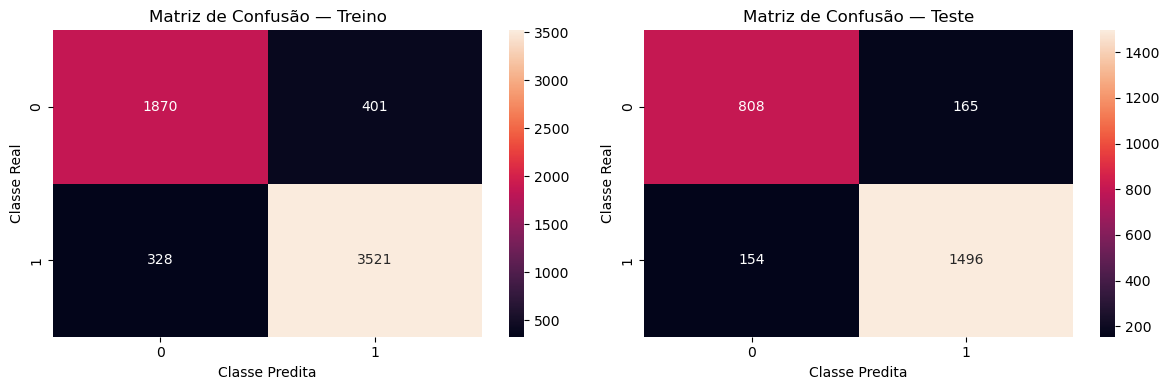

In [209]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


y_pred_train = best_lr.predict(X_treino)
y_pred_test  = best_lr.predict(X_teste)


plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_treino, y_pred_train), annot=True, fmt='d')
plt.title('Matriz de Confusão — Treino')
plt.xlabel('Classe Predita')
plt.ylabel('Classe Real')

plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y_teste, y_pred_test), annot=True, fmt='d')
plt.title('Matriz de Confusão — Teste')
plt.xlabel('Classe Predita')
plt.ylabel('Classe Real')

plt.tight_layout()
plt.show()


### Modelo 2 - Random Forest

O modelo Random Forest foi testado por ser uma técnica robusta, capaz de capturar relações não lineares e interações entre variáveis.
Além disso, ele lida bem com variáveis categóricas transformadas em dummies e nos permite avaliar a **importância de cada variável** na tomada de decisão.

Esse modelo demonstrou resultados robustos tanto em acurácia quanto em F1-score

In [210]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, roc_curve, auc
import matplotlib.pyplot as plt



# 1) Definir o grid de hiper-parâmetros
param_grid = {
    'n_estimators':     [100, 200],
    'max_depth':        [None, 5, 10, 20],
    'min_samples_split':[2, 5, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'max_features':     ['sqrt', 'log2']
}

# 2) Configurar StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 3) GridSearchCV
grid_rf = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=cv,
    scoring='recall_macro',
    n_jobs=-1,
    verbose=1
)
grid_rf.fit(X_treino, y_treino)

print("Melhores parâmetros RF:", grid_rf.best_params_)

Fitting 5 folds for each of 192 candidates, totalling 960 fits
Melhores parâmetros RF: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}


In [211]:
best_rf = grid_rf.best_estimator_

y_pred_train = best_rf.predict(X_treino)
print("=== RF Tunado — TREINO ===")
print(classification_report(y_treino, y_pred_train))

y_pred_test = best_rf.predict(X_teste)
print("=== RF Tunado — TESTE ===")
print(classification_report(y_teste, y_pred_test))

=== RF Tunado — TREINO ===
              precision    recall  f1-score   support

           0       0.94      0.89      0.91      2271
           1       0.94      0.97      0.95      3849

    accuracy                           0.94      6120
   macro avg       0.94      0.93      0.93      6120
weighted avg       0.94      0.94      0.94      6120

=== RF Tunado — TESTE ===
              precision    recall  f1-score   support

           0       0.87      0.82      0.85       973
           1       0.90      0.93      0.91      1650

    accuracy                           0.89      2623
   macro avg       0.89      0.88      0.88      2623
weighted avg       0.89      0.89      0.89      2623



## Importância das Variáveis

Após treinar o modelo de Random Forest, é possível extrair as variáveis mais relevantes para prever se uma venda terá lucro aceitável.  
Isso permite que a empresa **direcione seus esforços** para os fatores que realmente impactam nos resultados.

In [212]:
best_rf = grid_rf.best_estimator_
importancias = pd.Series(
    best_rf.feature_importances_,
    index=X_treino.columns
)
top10 = importancias.sort_values(ascending=False).head(10)
print(top10)

desconto                      0.286912
vendas                        0.117288
subcategoria_Papel            0.059213
subcategoria_Armazenamento    0.038827
subcategoria_Pastas           0.035725
quantidade                    0.029736
mes_pedido                    0.029085
categoria_Móveis              0.027713
categoria_Tecnologia          0.027657
subcategoria_Cadeiras         0.025031
dtype: float64


### Curva ROC - Random Forest

Assim como na regressão logística, a Curva ROC mostra a performance do modelo em classificar corretamente os casos.  
No caso da Random Forest, o desempenho foi ainda melhor, mostrando maior capacidade de identificar corretamente as vendas com lucro aceitável.  
O AUC também ficou próximo de 1, indicando excelente separação entre os casos positivos e negativos.


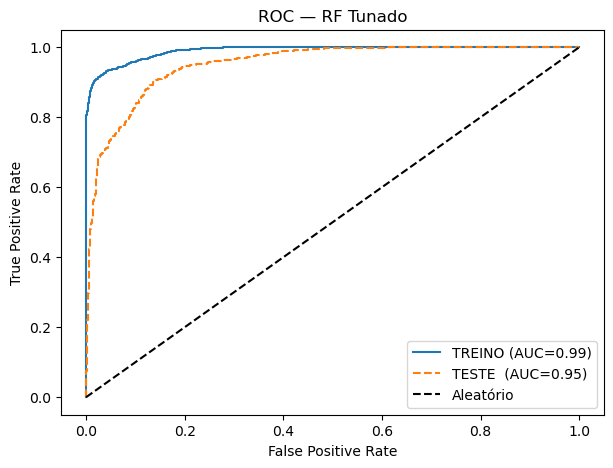

In [213]:
y_prob_train = best_rf.predict_proba(X_treino)[:, 1]
y_prob_test  = best_rf.predict_proba(X_teste)[:, 1]

# Cálculo das curvas ROC e AUC
fpr_tr, tpr_tr, _ = roc_curve(y_treino, y_prob_train)
fpr_te, tpr_te, _ = roc_curve(y_teste,  y_prob_test)
auc_tr = auc(fpr_tr, tpr_tr)
auc_te = auc(fpr_te, tpr_te)

# Plot
plt.figure(figsize=(7,5))
plt.plot(fpr_tr, tpr_tr,     label=f'TREINO (AUC={auc_tr:.2f})')
plt.plot(fpr_te, tpr_te, '--', label=f'TESTE  (AUC={auc_te:.2f})')
plt.plot([0,1],[0,1],'k--', label='Aleatório')
plt.title('ROC — RF Tunado')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

### Matriz de Confusão - Random Forest

Assim como no modelo anterior, a matriz de confusão mostra os acertos e erros do modelo.  
Com a Random Forest, os acertos foram ainda mais equilibrados entre as classes, o que indica uma **boa capacidade de identificar corretamente os dois tipos de venda**: com e sem lucro aceitável.

Além disso, o número total de erros foi menor, especialmente nos **falsos positivos**, o que aumenta a confiança nas previsões do modelo.


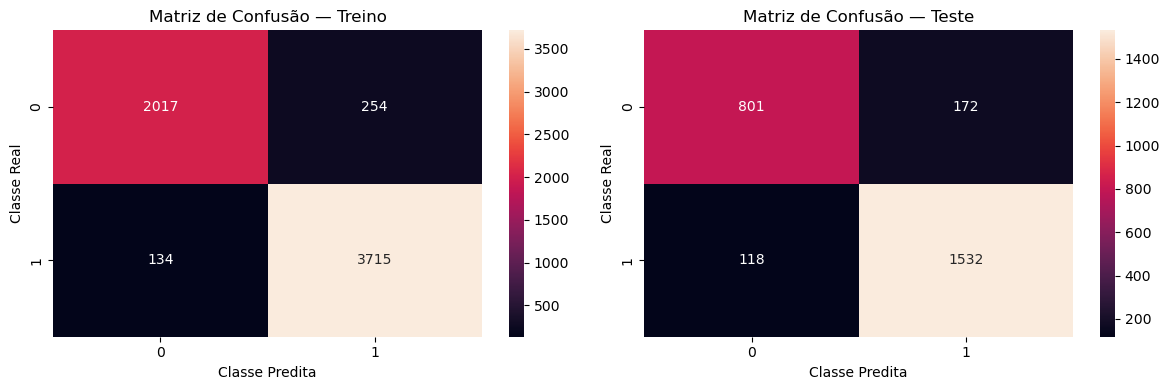

In [214]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


y_pred_train = best_rf.predict(X_treino)
y_pred_test  = best_rf.predict(X_teste)


plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_treino, y_pred_train), annot=True, fmt='d')
plt.title('Matriz de Confusão — Treino')
plt.xlabel('Classe Predita')
plt.ylabel('Classe Real')

plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y_teste, y_pred_test), annot=True, fmt='d')
plt.title('Matriz de Confusão — Teste')
plt.xlabel('Classe Predita')
plt.ylabel('Classe Real')

plt.tight_layout()
plt.show()


## Modelo Dummy

O modelo Dummy foi utilizado como linha de base para comparação com os modelos preditivos mais avançados. Ele não aprende com os dados, apenas segue uma estratégia simples de previsão, como sempre prever a classe mais frequente.

No nosso caso, usamos a estratégia 'most_frequent', onde o modelo sempre prediz a classe que mais aparece no conjunto de treino.

Essa abordagem permite avaliar se os modelos reais estão realmente fazendo previsões melhores do que o acaso.

In [215]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report

dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(X_treino, y_treino)

y_pred_dummy = dummy.predict(X_teste)

print(classification_report(y_teste, y_pred_dummy))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       973
           1       0.63      1.00      0.77      1650

    accuracy                           0.63      2623
   macro avg       0.31      0.50      0.39      2623
weighted avg       0.40      0.63      0.49      2623



c:\Users\pedro\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pedro\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pedro\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Conclusão da Modelagem

Com base nos testes realizados, concluímos que o modelo **Random Forest** apresentou o melhor desempenho, com **AUC de 0.99** e boa precisão para ambos os modelos.  
As variáveis `desconto` e `vendas` foram as que mais influenciaram o resultado, o que reforça a importância de políticas comerciais eficientes para maximizar o lucro.  
Esses insights podem ser utilizados para **apoiar decisões estratégicas** da empresa.


## Lucro médio por pedido - por estado

Este gráfico mostra quais estados geram maior lucro médio por pedido.

C:\Users\pedro\AppData\Local\Temp\ipykernel_36856\3995198817.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  lucro_medio = df_R_amaral.groupby('estado')['lucro'].mean().sort_values(ascending=False)


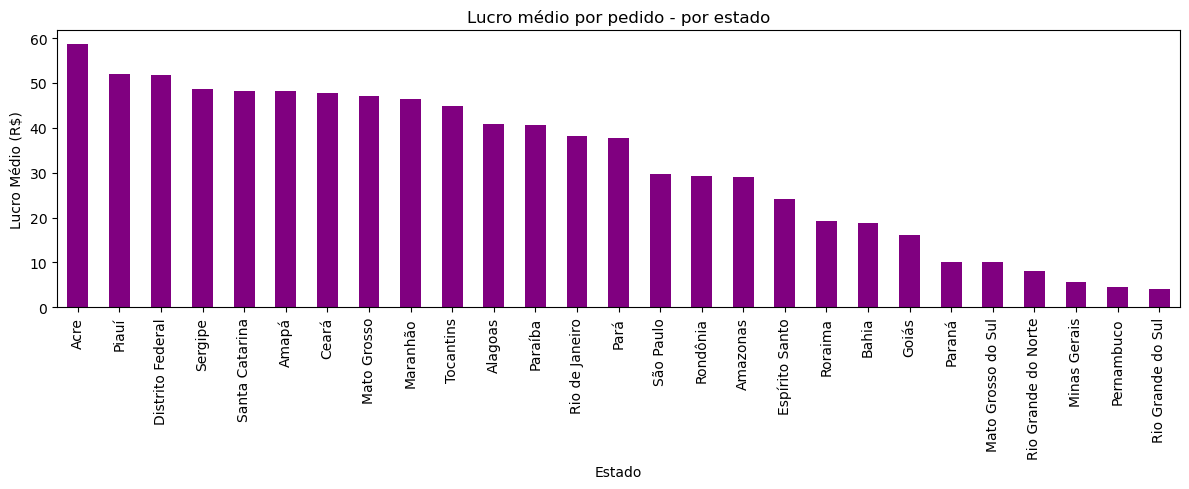

In [216]:
lucro_medio = df_R_amaral.groupby('estado')['lucro'].mean().sort_values(ascending=False)

lucro_medio.plot(kind='bar', figsize=(12, 5), color='purple')
plt.title('Lucro médio por pedido - por estado')
plt.xlabel('Estado')
plt.ylabel('Lucro Médio (R$)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Estados como **Amapá** e **Distrito Federal** se destacam com maiores lucros, enquanto **Minas Gerais** e **Pernambuco** apresentam os menores valores.

Essas diferenças ajudam a identificar **oportunidades de melhoria regional** e onde concentrar esforços para aumentar a rentabilidade.

## Porcentagem de pedidos com lucro aceitável por estado

Este gráfico mostra a **proporção de pedidos que atingiram uma margem de lucro considerada aceitável (acima de 10%)** em cada estado.

A visualização permite identificar **quais regiões estão performando melhor em termos de rentabilidade relativa**, ou seja, onde as vendas tendem a ser mais lucrativas proporcionalmente, independentemente do valor total faturado.

C:\Users\pedro\AppData\Local\Temp\ipykernel_36856\22369285.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pedidos_aceitaveis = df_R_amaral.groupby('estado')['lucro_aceitavel'].mean().sort_values(ascending=False)


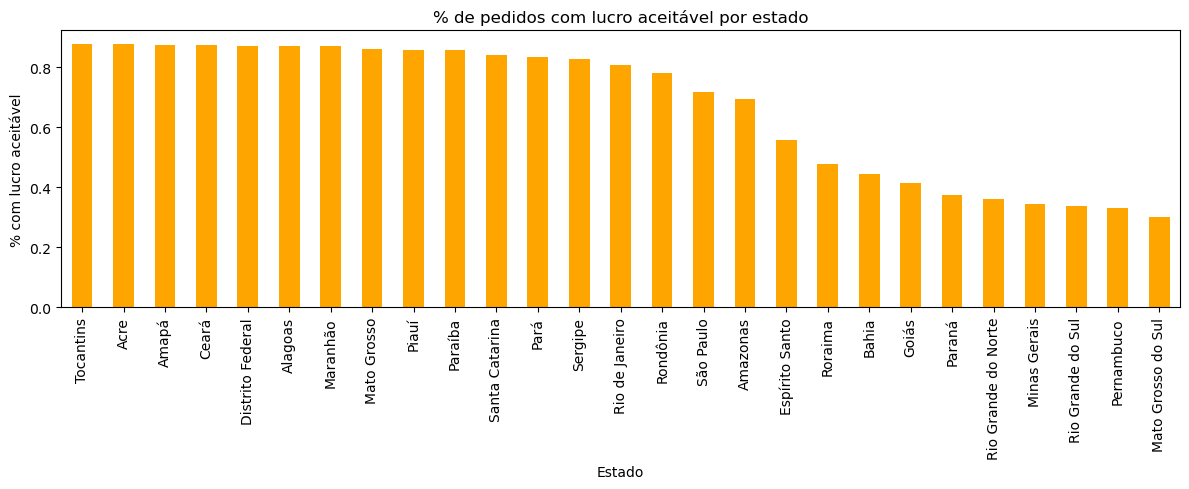

In [217]:
pedidos_aceitaveis = df_R_amaral.groupby('estado')['lucro_aceitavel'].mean().sort_values(ascending=False)

pedidos_aceitaveis.plot(kind='bar', figsize=(12, 5), color='orange')
plt.title('% de pedidos com lucro aceitável por estado')
plt.xlabel('Estado')
plt.ylabel('% com lucro aceitável')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Estados como **Amapá, Santa Catarina e Alagoas** se destacam por apresentarem **altos percentuais de pedidos com lucro aceitável**, o que pode indicar controle de custos ou menor incidência de descontos.

Por outro lado, **Minas Gerais, Paraná e Rio Grande do Sul** apresentaram os **menores percentuais**, sugerindo que **há oportunidades de melhoria na operação desses estados** - seja ajustando descontos ou otimizando processos logísticos.

Este tipo de análise permite à empresa **tomar decisões mais informadas por região**, direcionando estratégias específicas para melhorar a margem de lucro em estados com menor desempenho.

## Tempo médio de preparo por tipo de envio

Este gráfico mostra quanto tempo, em média, os pedidos levam para serem preparados antes do envio, de acordo com o tipo de frete.

Mesmo sem considerar o tempo total de entrega, o preparo influencia diretamente na agilidade do processo logístico.  
Diferenças entre os métodos podem indicar **ineficiências internas** e apontar onde a empresa pode **otimizar a operação**.

C:\Users\pedro\AppData\Local\Temp\ipykernel_36856\1795251695.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tempo_medio_entrega = df_R_amaral.groupby('modo_envio')['tempo_preparacao'].mean().sort_values()


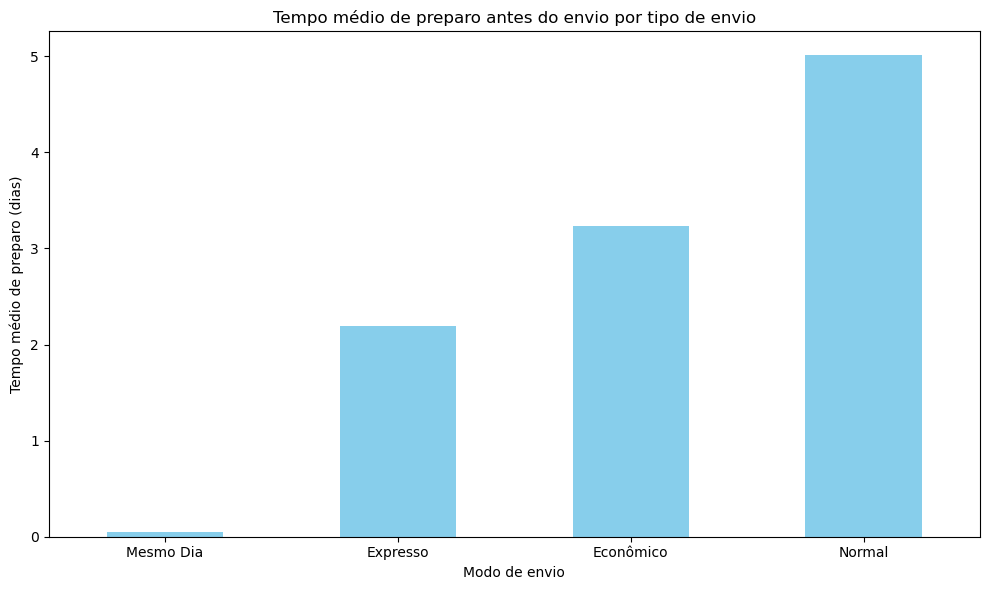

In [218]:
tempo_medio_entrega = df_R_amaral.groupby('modo_envio')['tempo_preparacao'].mean().sort_values()

plt.figure(figsize=(10, 6))
tempo_medio_entrega.plot(kind='bar', color='skyblue')

plt.title('Tempo médio de preparo antes do envio por tipo de envio')
plt.xlabel('Modo de envio')
plt.ylabel('Tempo médio de preparo (dias)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Gráfico Lucro por Modo de envio

C:\Users\pedro\AppData\Local\Temp\ipykernel_36856\2136103284.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  lucro_por_envio = df_R_amaral.groupby('modo_envio')['lucro'].sum().reset_index()
C:\Users\pedro\AppData\Local\Temp\ipykernel_36856\2136103284.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='modo_envio', y='lucro', data=lucro_por_envio, palette='viridis')


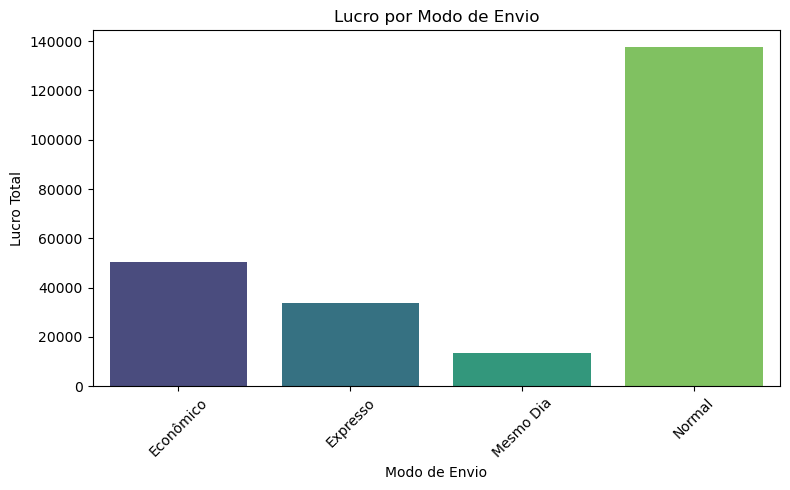

In [219]:
lucro_por_envio = df_R_amaral.groupby('modo_envio')['lucro'].sum().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x='modo_envio', y='lucro', data=lucro_por_envio, palette='viridis')
plt.title('Lucro por Modo de Envio')
plt.xlabel('Modo de Envio')
plt.ylabel('Lucro Total')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Quantidade de vendas por categoria em cada estação

C:\Users\pedro\AppData\Local\Temp\ipykernel_36856\1037536527.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  vendas_freq = df_R_amaral.groupby(['estacao', 'categoria']).size().reset_index(name='quantidade')


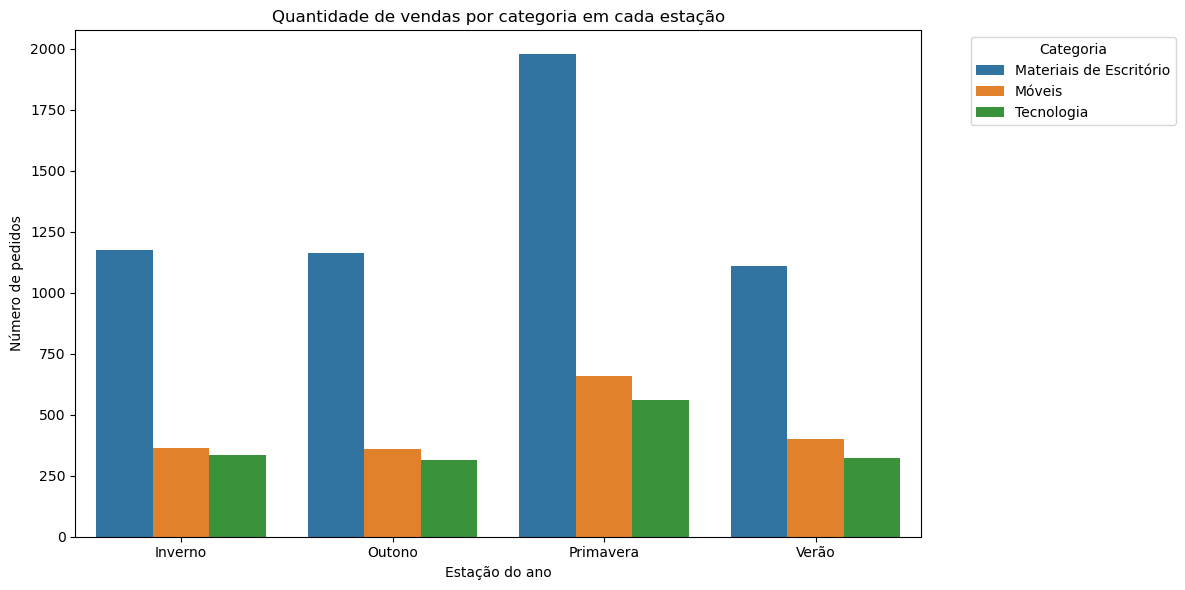

In [220]:
def mes_para_estacao(mes):
    if mes in [12, 1, 2]:
        return 'Verão'
    elif mes in [3, 4, 5]:
        return 'Outono'
    elif mes in [6, 7, 8]:
        return 'Inverno'
    else:
        return 'Primavera'

df_R_amaral['estacao'] = df_R_amaral['mes_pedido'].apply(mes_para_estacao)

vendas_freq = df_R_amaral.groupby(['estacao', 'categoria']).size().reset_index(name='quantidade')

plt.figure(figsize=(12, 6))
sns.barplot(data=vendas_freq, x='estacao', y='quantidade', hue='categoria')
plt.title('Quantidade de vendas por categoria em cada estação')
plt.ylabel('Número de pedidos')
plt.xlabel('Estação do ano')
plt.legend(title='Categoria', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

A categoria Materiais de Escritório tem um aumento expressivo na primavera, possivelmente por estar ligada a períodos de reorganização e planejamento (como o início do segundo semestre fiscal).

O verão e o outono apresentam menor volume de pedidos em todas as categorias, o que pode estar relacionado a períodos de férias e menor atividade comercial.

Ou seja, esses padrões podem ajudar a empresa a planejar promoções sazonais, alocar estoque e recursos de marketing com mais eficiência ao longo do ano.

## Desconto Médio por Estado

Este gráfico mostra quanto, em média, foi concedido de desconto nas vendas de cada estado.

C:\Users\pedro\AppData\Local\Temp\ipykernel_36856\375044123.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  desconto_medio = df_R_amaral.groupby('estado')['desconto'].mean().sort_values(ascending=False)


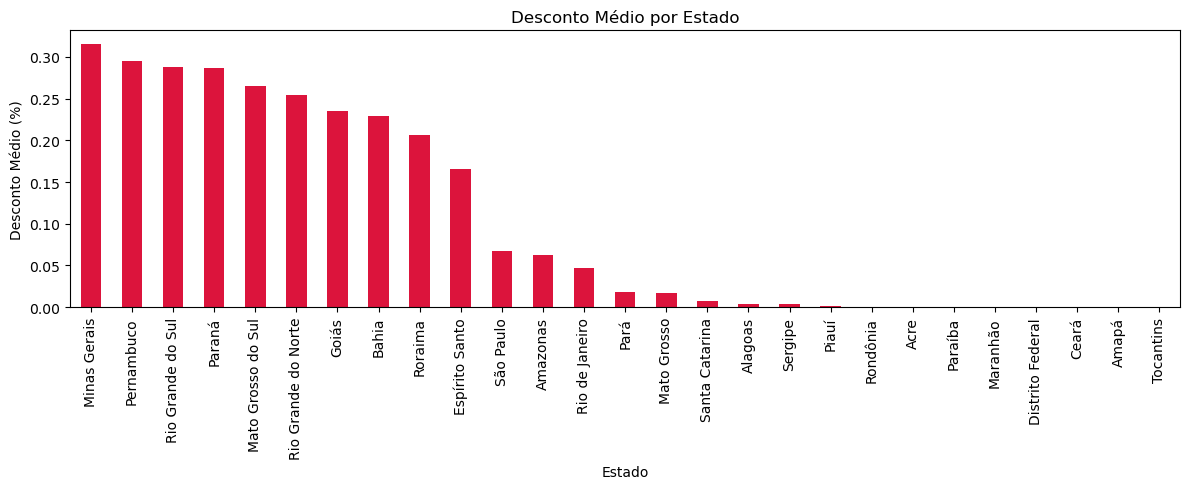

In [221]:
desconto_medio = df_R_amaral.groupby('estado')['desconto'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 5))
desconto_medio.plot(kind='bar', color='crimson')
plt.title('Desconto Médio por Estado')
plt.xlabel('Estado')
plt.ylabel('Desconto Médio (%)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Minas Gerais, Pernambuco e Paraná aplicaram os maiores descontos médios, o que pode indicar estratégias comerciais mais agressivas ou maior sensibilidade ao preço nessas regiões.

Já estados como Tocantins, Amapá e Ceará praticamente não utilizam descontos, sugerindo vendas mais diretas ou menor dependência de promoções.

Essa análise é útil para entender diferenças regionais nas políticas de preço e pode ajudar a empresa a equilibrar margem e competitividade em diferentes localidades.